# Constraints on non-linear tides due to p-g mode coupling from the neutron-star merger GW170817

**Steven Reyes<sup>1</sup> and Duncan A Brown<sup>1</sup>**

**<sup>1</sup>Department of Physics, Syracuse University, Syracuse, NY 13244, USA**

## License

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

## Introduction

This notebook is a companion to the paper presented at [arXiv:1808.07013](https://arxiv.org/abs/1808.07013). It demonstrates how to make the figures in the paper and compute the Bayes factors comparing the analyses with and without the effect of nonlinear tides.

We encourage use of these data in derivative works. If you use the material provided here, please cite the paper using the reference:

```
@article{Reyes:2018bee,
      author         = "Reyes, Steven and Brown, Duncan A.",
      title          = "{Constraints on non-linear tides due to $p$-$g$ mode
                        coupling from the neutron-star merger GW170817}",
      year           = "2018",
      eprint         = "1808.07013",
      archivePrefix  = "arXiv",
      primaryClass   = "astro-ph.HE",
      SLACcitation   = "%%CITATION = ARXIV:1808.07013;%%"
}
```

## Data
We provide the data from thinned posterior samples from the MCMC chains used to produce Bayes factor calculations
and posterior distribution data. All of the files contain the thinned chained of the posterior samples using the sky localization constraint, chirp mass constraint, common equation of state constraint from [De et al. (2018)](https://arxiv.org/abs/1804.08583), with mass distribution prior distributions for each of the binary neutron stars from [De et al. (2018)](https://arxiv.org/abs/1804.08583). Each file refers to two different mass priors from [De et al. (2018)](https://arxiv.org/abs/1804.08583) and with different choices of the range of f0, the turn-on frequency of the p-g mode energy loss.

The data files are:

1. [gaussian_small_f0_range.hdf](https://github.com/sugwg/gw170817-pg-modes/blob/master/gaussian_small_f0_range.hdf), the Gaussian mass distribution in common with De et al. (2018), but with p-g mode instability parameters: saturation frequency ($f_0$) between 15 and 100 Hz, amplitude scaling ($A$) between $10^-10$ and $10^-6$, and frequency evolution exponent ($n$) between -1.1 and 2.999.
2. [gaussian_large_f0_range.hdf](https://github.com/sugwg/gw170817-pg-modes/blob/master/gaussian_large_f0_range.hdf), the Gaussian mass distribution in common with De et al. (2018), but with p-g mode instability parameters: saturation frequency ($f_0$) between 15 and 800 Hz, amplitude scaling ($A$) between $10^-10$ and $10^-6$, and frequency evolution exponent ($n$) between -1.1 and 2.999.
3. [uniform_small_f0_range.hdf](https://github.com/sugwg/gw170817-pg-modes/blob/master/uniform_small_f0_range.hdf), the uniform mass distribution in common with De et al. (2018), but with p-g mode instability parameters: saturation frequency ($f_0$) between 15 and 100 Hz, amplitude scaling ($A$) between $10^-10$ and $10^-6$, and frequency evolution exponent ($n$) between -1.1 and 2.999.
4. [uniform_large_f0_range.hdf](https://github.com/sugwg/gw170817-pg-modes/blob/master/uniform_large_f0_range.hdf), the uniform mass distribution in common with De et al. (2018), but with p-g mode instability parameters: saturation frequency ($f_0$) between 15 and 800 Hz, amplitude scaling ($A$) between $10^-10$ and $10^-6$, and frequency evolution exponent ($n$) between -1.1 and 2.999.

## Notebooks

An ipython notebook is provided, [pg_mode_notebook.ipynb](https://github.com/sugwg/gw170817-pg-modes/blob/master/pg_mode_notebook.ipynb) for regenerating the plots used in "Constraints on non-linear tides due to p-g mode coupling from the neutron-star merger GW170817", with some additional posterior plots. All results are generated using the [PyCBC v1.9.4 release](https://github.com/gwastro/pycbc/releases/tag/v1.9.4) with the addition of a [patch to fix the stationary phase approximation for the effect of nonlinear tides](https://github.com/gwastro/pycbc/pull/2284). The prior distribution plots, Bayes factor calculations, and posterior distribution plots can be generated using the [PyCBC v1.9.4 release](https://github.com/gwastro/pycbc/releases/tag/v1.9.4) with the addition of a [patch to allow logarithmic spaced histograms in posterior plots](https://github.com/gwastro/pycbc/pull/2285). These patches have been merged into the master branch of PyCBC.

## Acknowledgements
We thank Soumi De and Daniel Finstad for helpful discussions. We thank Alex Nitz for writing the initial version of
the code for non-linear tides in PyCBC.

## Funding
The authors were supported by the National Science Foundation grant PHY-1707954.
Computational work was supported by Syracuse University and National Science Foundation grant OAC-1541396.
This research has made use of data obtained from the  [LIGO Open Science Center](http://losc.ligo.org).

## Imports

In [1]:
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
import numpy
from pycbc import conversions
from pycbc import cosmology
from pycbc.distributions import uniform, uniform_log
from IPython.display import Image

## Figure 1. Prior probability distributions on the parameters $(f_0, n, A)$ and $\delta\phi$

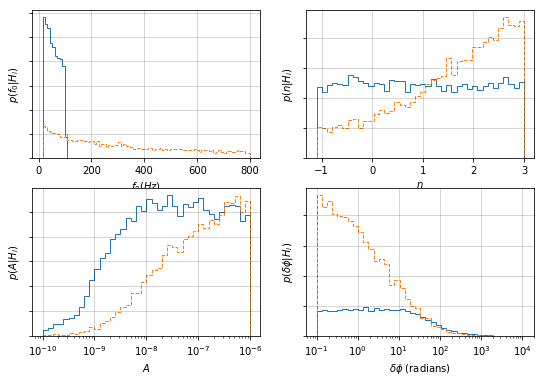

In [2]:
numpy.random.seed(seed=1234)
# Number of samples to generate for prior plot
num_samples_init = 1000000

### Draw masses from uniform prior
mass1_uni_pdf = uniform.Uniform(samples=(1.0,2.0))
mass2_uni_pdf = uniform.Uniform(samples=(1.0,2.0))

# Source frame masses
mass1_uni_samples = mass1_uni_pdf.rvs(num_samples_init)["samples"]
mass2_uni_samples = mass2_uni_pdf.rvs(num_samples_init)["samples"]

# Only keep samples where mass1 > mass2
keep_idx = mass1_uni_samples > mass2_uni_samples
mass1_uni_samples = mass1_uni_samples[keep_idx]
mass2_uni_samples = mass2_uni_samples[keep_idx]

# Convert to chirp mass and apply chirp mass cuts
chirp_mass_uni = conversions.mchirp_from_mass1_mass2(mass1_uni_samples,
                                                     mass2_uni_samples)

# Chirp mass cuts
keep_idx = chirp_mass_uni > 1.1876
chirp_mass_uni = chirp_mass_uni[keep_idx]
mass1_uni_samples = mass1_uni_samples[keep_idx]
mass2_uni_samples = mass2_uni_samples[keep_idx]

keep_idx = chirp_mass_uni < 1.2076
chirp_mass_uni = chirp_mass_uni[keep_idx]
mass1_uni_samples = mass1_uni_samples[keep_idx]
mass2_uni_samples = mass2_uni_samples[keep_idx]

num_samples_final = len(chirp_mass_uni)

### Make f0 p-g mode parameter space set
f0_small_pdf = uniform.Uniform(samples=(15., 100.))
f0_small_samples = f0_small_pdf.rvs(num_samples_final)["samples"]

f0_big_pdf = uniform.Uniform(samples=(15., 800.))
f0_big_samples = f0_big_pdf.rvs(num_samples_final)["samples"]

### Make the rest of the p-g-mode priors
n_pdf = uniform.Uniform(samples=(-1.1, 2.999))
n_samples = n_pdf.rvs(num_samples_final)["samples"]

A_pdf = uniform_log.UniformLog10(samples=(10**-10,10**-6))
A_samples = A_pdf.rvs(num_samples_final)["samples"]

# Calculate dphi arrays
flow = 20.0

dphi_uniform_small = conversions.nltides_gw_phase_diff_isco(flow,
                                                    f0_small_samples,
                                                    A_samples,
                                                    n_samples,
                                                    mass1_uni_samples,
                                                    mass2_uni_samples)

dphi_uniform_large = conversions.nltides_gw_phase_diff_isco(flow,
                                                    f0_big_samples,
                                                    A_samples,
                                                    n_samples,
                                                    mass1_uni_samples,
                                                    mass2_uni_samples)
keep_idx1 = dphi_uniform_small > 0.1
keep_idx2 = dphi_uniform_large > 0.1

num_bins = 85
fig, axarr = plt.subplots(2, 2)
bin_edges = numpy.linspace(15.0, 800.0, num_bins + 1, endpoint=True)
axarr[0][0].hist(f0_small_samples[keep_idx1], bins=bin_edges,
                 histtype="step", normed=True,
                 label="Prior for $f_0$ $\in$ (15, 100) $\mathrm{Hz}$")
axarr[0][0].hist(f0_big_samples[keep_idx2], bins=bin_edges,
                 histtype="step", normed=True,
                 label="Prior for $f_0$ $\in$ (15, 800) $\mathrm{Hz}$",
                 linestyle="--")
axarr[0][0].set_xlabel("$f_0 (Hz)$")
axarr[0][0].set_ylabel("$p(f_0 | H_i)$")

num_bins = 40
bin_edges = numpy.linspace(-1.1, 3.0, num_bins + 1, endpoint=True)
axarr[0][1].hist(n_samples[keep_idx1], bins=bin_edges,
                 histtype="step", normed=True,)
axarr[0][1].hist(n_samples[keep_idx2], bins=bin_edges,
                 histtype="step", normed=True,
                 linestyle="--")
axarr[0][1].set_xlabel("$n$")
axarr[0][1].set_ylabel("$p(n | H_i)$")

bin_edges = numpy.logspace(-10.0, -6.0, num_bins + 1, endpoint=True)
axarr[1][0].hist(A_samples[keep_idx1], bins=bin_edges,
                 histtype="step", normed=True,
                 weights=A_samples[keep_idx1]*numpy.log(10))
axarr[1][0].hist(A_samples[keep_idx2], bins=bin_edges,
                 histtype="step", normed=True,
                 weights=A_samples[keep_idx2]*numpy.log(10),
                 linestyle="--")
axarr[1][0].set_xlabel("$A$")
axarr[1][0].set_ylabel("$p(A | H_i)$")
axarr[1][0].set_xscale("log")

bin_edges = numpy.logspace(-1.0, 4.05, num_bins + 1, endpoint=True)
axarr[1][1].hist(dphi_uniform_small[keep_idx1], bins=bin_edges,
                 histtype="step", normed=True,
                 weights=dphi_uniform_small[keep_idx1]*numpy.log(10))

axarr[1][1].hist(dphi_uniform_large[keep_idx2], bins=bin_edges,
                 histtype="step", normed=True,
                 weights=dphi_uniform_large[keep_idx2]*numpy.log(10),
                 linestyle="--")
axarr[1][1].set_xlabel("$\delta \phi$ $\mathrm{(radians)}$")
axarr[1][1].set_ylabel("$p(\delta \phi | H_i)$")
axarr[1][1].set_xscale("log")

axarr[0][0].grid(color="k", which="major", axis="both", alpha=0.2)
axarr[0][0].yaxis.set_ticklabels([])
axarr[0][1].grid(color="k", which="major", axis="both", alpha=0.2)
axarr[0][1].yaxis.set_ticklabels([])
axarr[1][0].grid(color="k", which="major", axis="both", alpha=0.2)
axarr[1][0].yaxis.set_ticklabels([])
axarr[1][1].grid(color="k", which="major", axis="both", alpha=0.2)
axarr[1][1].yaxis.set_ticklabels([])

length_column = 6
fig.set_size_inches(1.5*length_column, length_column)

plt.show()

Prior probability distributions on the parameters $(f_0, n, A)$ for the waveform model $H_i = \tilde{h}_\mathrm{TaylorF2+NL}(f)$ and the resulting prior on the gravitational-wave phase shift $\delta\phi$ shift due to nonlinear tides. The cut $\delta\phi \ge 0.1$~rad has been applied when generating these priors. The solid (dashed) lines shows the priors when $f_0$ is drawn from a uniform distribution between $15$ and $100$~Hz ($800$~Hz). The prior on the amplitude is biased towards large amplitudes that give larger phase shifts.

## Bayes Factor Calculations
We provide a small verification calculation for thinned posterior results to verify
the Bayes Factor calculations in the text. For the sake of not mounting multiple files we
simply provide the evidence from De et al's DNS Gaussian mass distribution run and Uniform mass distribution run
with the common equation of state constraints on each neutron star.

In [3]:
from pycbc.io.inference_hdf import InferenceFile
from pycbc.inference import option_utils
import emcee
import numpy

# Thinned chains from
# "Constraints on non-linear tides due to p-g mode coupling from the neutron star merger GW170817"
# by Steven Reyes and Duncan A. Brown

fp1 = InferenceFile('gaussian_small_f0_range.hdf','r')
fp2 = InferenceFile('gaussian_large_f0_range.hdf','r')
fp3 = InferenceFile('uniform_small_f0_range.hdf','r')
fp4 = InferenceFile('uniform_large_f0_range.hdf','r')

def calc_evidence(fp, start_iter=None, end_iter=None, interval_iter=None):

    stats_group=fp.stats_group
    parameters = fp[stats_group].keys()
    logstats = fp.read_samples(parameters, samples_group=stats_group, thin_start=start_iter,
                               thin_end=end_iter, thin_interval=interval_iter, temps='all', flatten=False)
    logls = logstats['loglr'] + fp.lognl
    betas = numpy.array(fp.attrs['betas'])
    ntemps = fp.ntemps
    nwalkers = fp.nwalkers
    ndim = len(fp.variable_args)
    dummy_sampler = emcee.PTSampler(ntemps, nwalkers, ndim, None, None, betas=betas)
    lnz, dlnz = dummy_sampler.thermodynamic_integration_log_evidence(logls=logls, fburnin=0.0)
    return lnz, dlnz


# Because the posterior hdf files were thinned beforehand we start our integration at iteration 0
# and run in intervals of 1, to the end of the file.
lnz1, dlnz1  = calc_evidence(fp1, start_iter=0, end_iter=-1, interval_iter=1)
lnz2, dlnz2 = calc_evidence(fp2, start_iter=0, end_iter=-1, interval_iter=1)
lnz3, dlnz3 = calc_evidence(fp3, start_iter=0, end_iter=-1, interval_iter=1)
lnz4, dlnz4 = calc_evidence(fp4, start_iter=0, end_iter=-1, interval_iter=1)

# Calculated from full runs and sampled at same thin_interval
De_et_al_gaussian_evidence_ln_z = -1348453.30987
De_et_al_uniform_evidence_ln_z = -1348453.08037


print("Gaussian mass distribution, small f0 range")
bayes_factor=numpy.exp(lnz1 - De_et_al_gaussian_evidence_ln_z)
print("log10 Bayes factor=%f\n"%numpy.log10(bayes_factor))

print("Gaussian mass distribution, large f0 range")
bayes_factor = numpy.exp(lnz2 - De_et_al_gaussian_evidence_ln_z)
print("log10 Bayes factor=%f\n"%numpy.log10(bayes_factor))

print("Uniform mass distribution, small f0 range")
bayes_factor=numpy.exp(lnz3 - De_et_al_uniform_evidence_ln_z)
print("log10 Bayes factor=%f\n"%numpy.log10(bayes_factor))

print("Uniform mass distribution, large f0 range")
bayes_factor = numpy.exp(lnz4 - De_et_al_uniform_evidence_ln_z)
print("log10 Bayes factor=%f\n"%numpy.log10(bayes_factor))
fp1.close()
fp2.close()
fp3.close()
fp4.close()

Gaussian mass distribution, small f0 range
log10 Bayes factor=-6.371896

Gaussian mass distribution, large f0 range
log10 Bayes factor=-4.757193

Uniform mass distribution, small f0 range
log10 Bayes factor=-9.211644

Uniform mass distribution, large f0 range
log10 Bayes factor=-6.075410



## Posterior Plots

We provide plotting scripts to plot the posteriors from the thinned posterior files. These files provide posteriors near the iterations presented in the paper, although other iterations of the files can be chosen to be plotted.

### Figure 2. Posterior for Gaussian Mass Distribution for $f_0$ between 15 and 100 Hz

In [4]:
!pycbc_inference_plot_posterior --plot-scatter \
--plot-contour \
--z-arg loglr \
--verbose \
--iteration -1 \
--input-file 'gaussian_small_f0_range.hdf' \
--output-file "gaussian_f0_15_100_Hz_posterior.png" \
--plot-marginal \
--parameters 'mchirp/(1+redshift(40.7)):$\mathcal{M}^{src}_{c}$' 'log10(amplitude):$log_{10}$ A' n 'f0:$f_0$' 'log10(nltides_gw_phase_diff_isco(20.0, f0, amplitude, n, mass1/(1+redshift(40.7)), mass2/(1+redshift(40.7)))):$log_{10}$ $\delta \phi$' \


2018-08-23 10:09:09,992 Loading parameters
2018-08-23 10:09:09,992 Reading input file gaussian_small_f0_range.hdf
2018-08-23 10:09:09,993 Loading samples
2018-08-23 10:09:10,012 Getting likelihood stats
2018-08-23 10:09:10,027 Plotting
/home/steven.reyes/pycbc-dev/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
2018-08-23 10:09:54,100 STREAM 'IHDR' 16 13
2018-08-23 10:09:54,100 STREAM 'sBIT' 41 4
2018-08-23 10:09:54,100 'sBIT' 41 4 (unknown)
2018-08-23 10:09:54,100 STREAM 'pHYs' 57 9
2018-08-23 10:09:54,101 STREAM 'IDAT' 78 8192
2018-08-23 10:09:54,956 Done


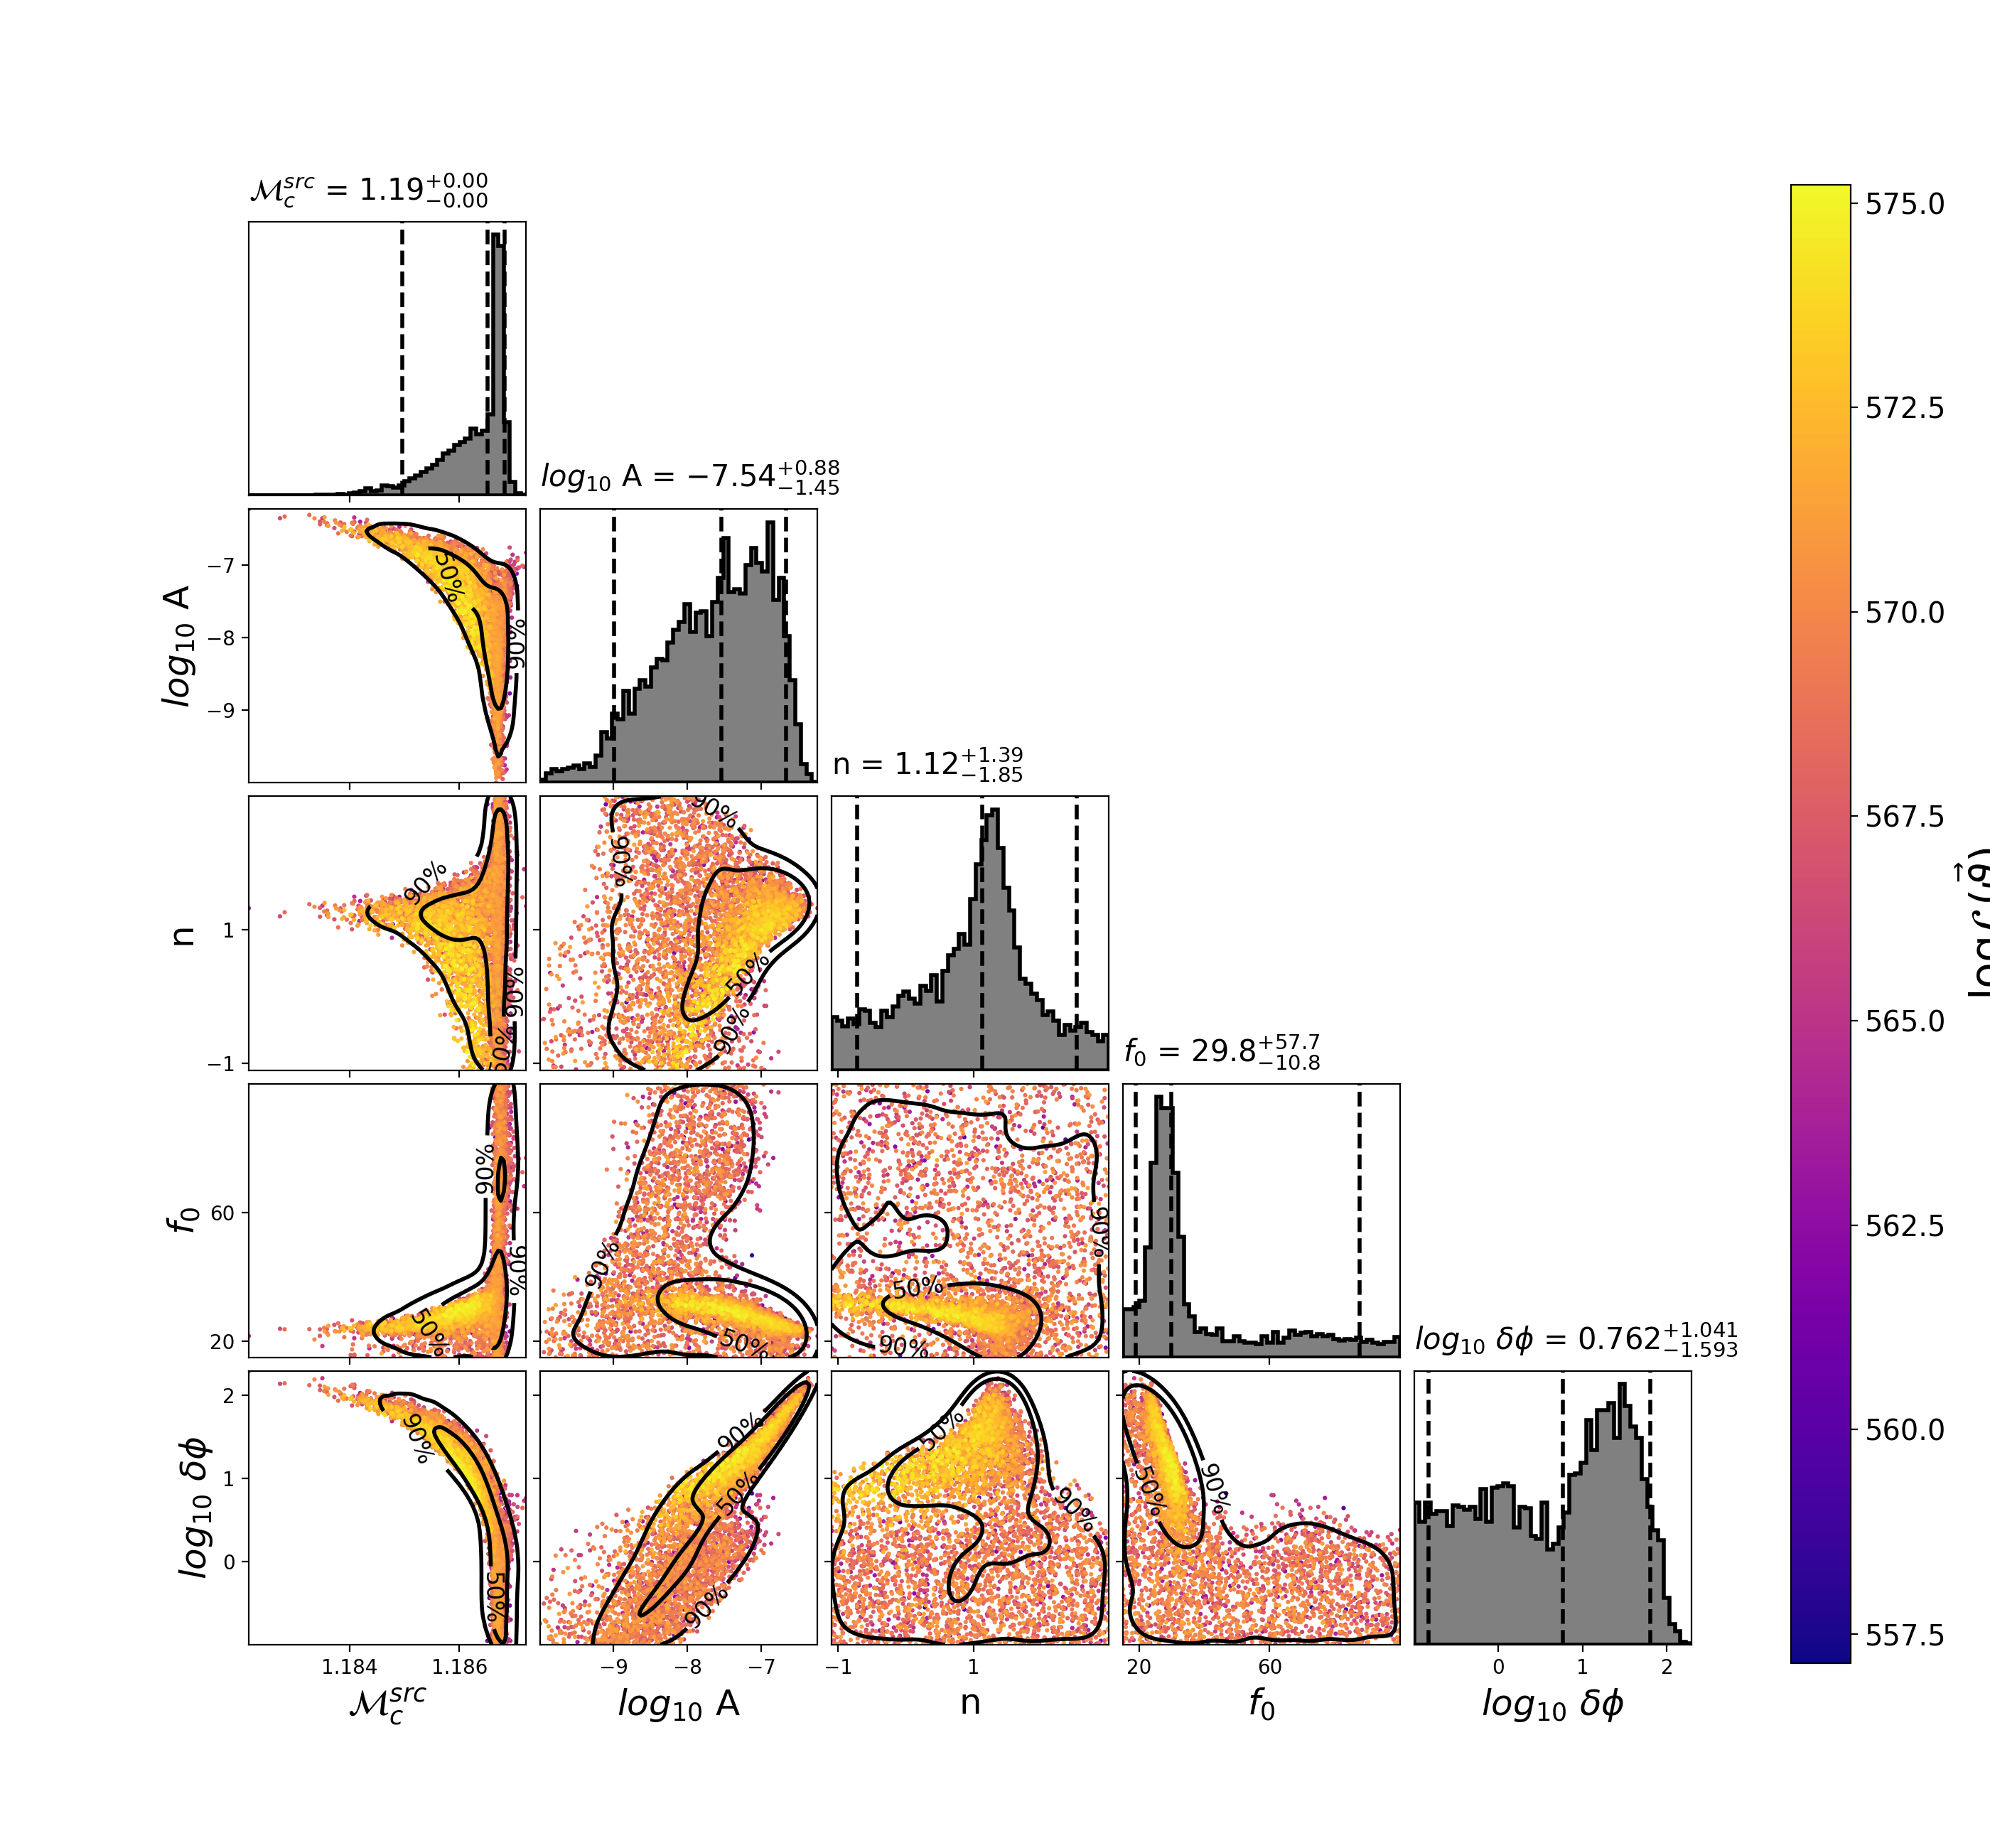

In [5]:
Image('gaussian_f0_15_100_Hz_posterior.png')

### Figure 3: Posterior for Uniform Mass Distribution for $f_0$ between 15 and 100 Hz

In [6]:
!pycbc_inference_plot_posterior --plot-scatter \
--plot-contour \
--z-arg loglr \
--verbose \
--iteration -1 \
--input-file 'uniform_small_f0_range.hdf' \
--output-file "uniform_f0_15_100_Hz_posterior.png" \
--plot-marginal \
--parameters 'mchirp/(1+redshift(40.7)):$\mathcal{M}^{src}_{c}$' 'log10(amplitude):$log_{10}$ A' n 'f0:$f_0$' 'log10(nltides_gw_phase_diff_isco(20.0, f0, amplitude, n, mass1/(1+redshift(40.7)), mass2/(1+redshift(40.7)))):$log_{10}$ $\delta \phi$' \

2018-08-23 10:09:57,914 Loading parameters
2018-08-23 10:09:57,914 Reading input file uniform_small_f0_range.hdf
2018-08-23 10:09:57,915 Loading samples
2018-08-23 10:09:57,934 Getting likelihood stats
2018-08-23 10:09:57,949 Plotting
/home/steven.reyes/pycbc-dev/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
2018-08-23 10:10:41,902 STREAM 'IHDR' 16 13
2018-08-23 10:10:41,902 STREAM 'sBIT' 41 4
2018-08-23 10:10:41,902 'sBIT' 41 4 (unknown)
2018-08-23 10:10:41,902 STREAM 'pHYs' 57 9
2018-08-23 10:10:41,903 STREAM 'IDAT' 78 8192
2018-08-23 10:10:42,769 Done


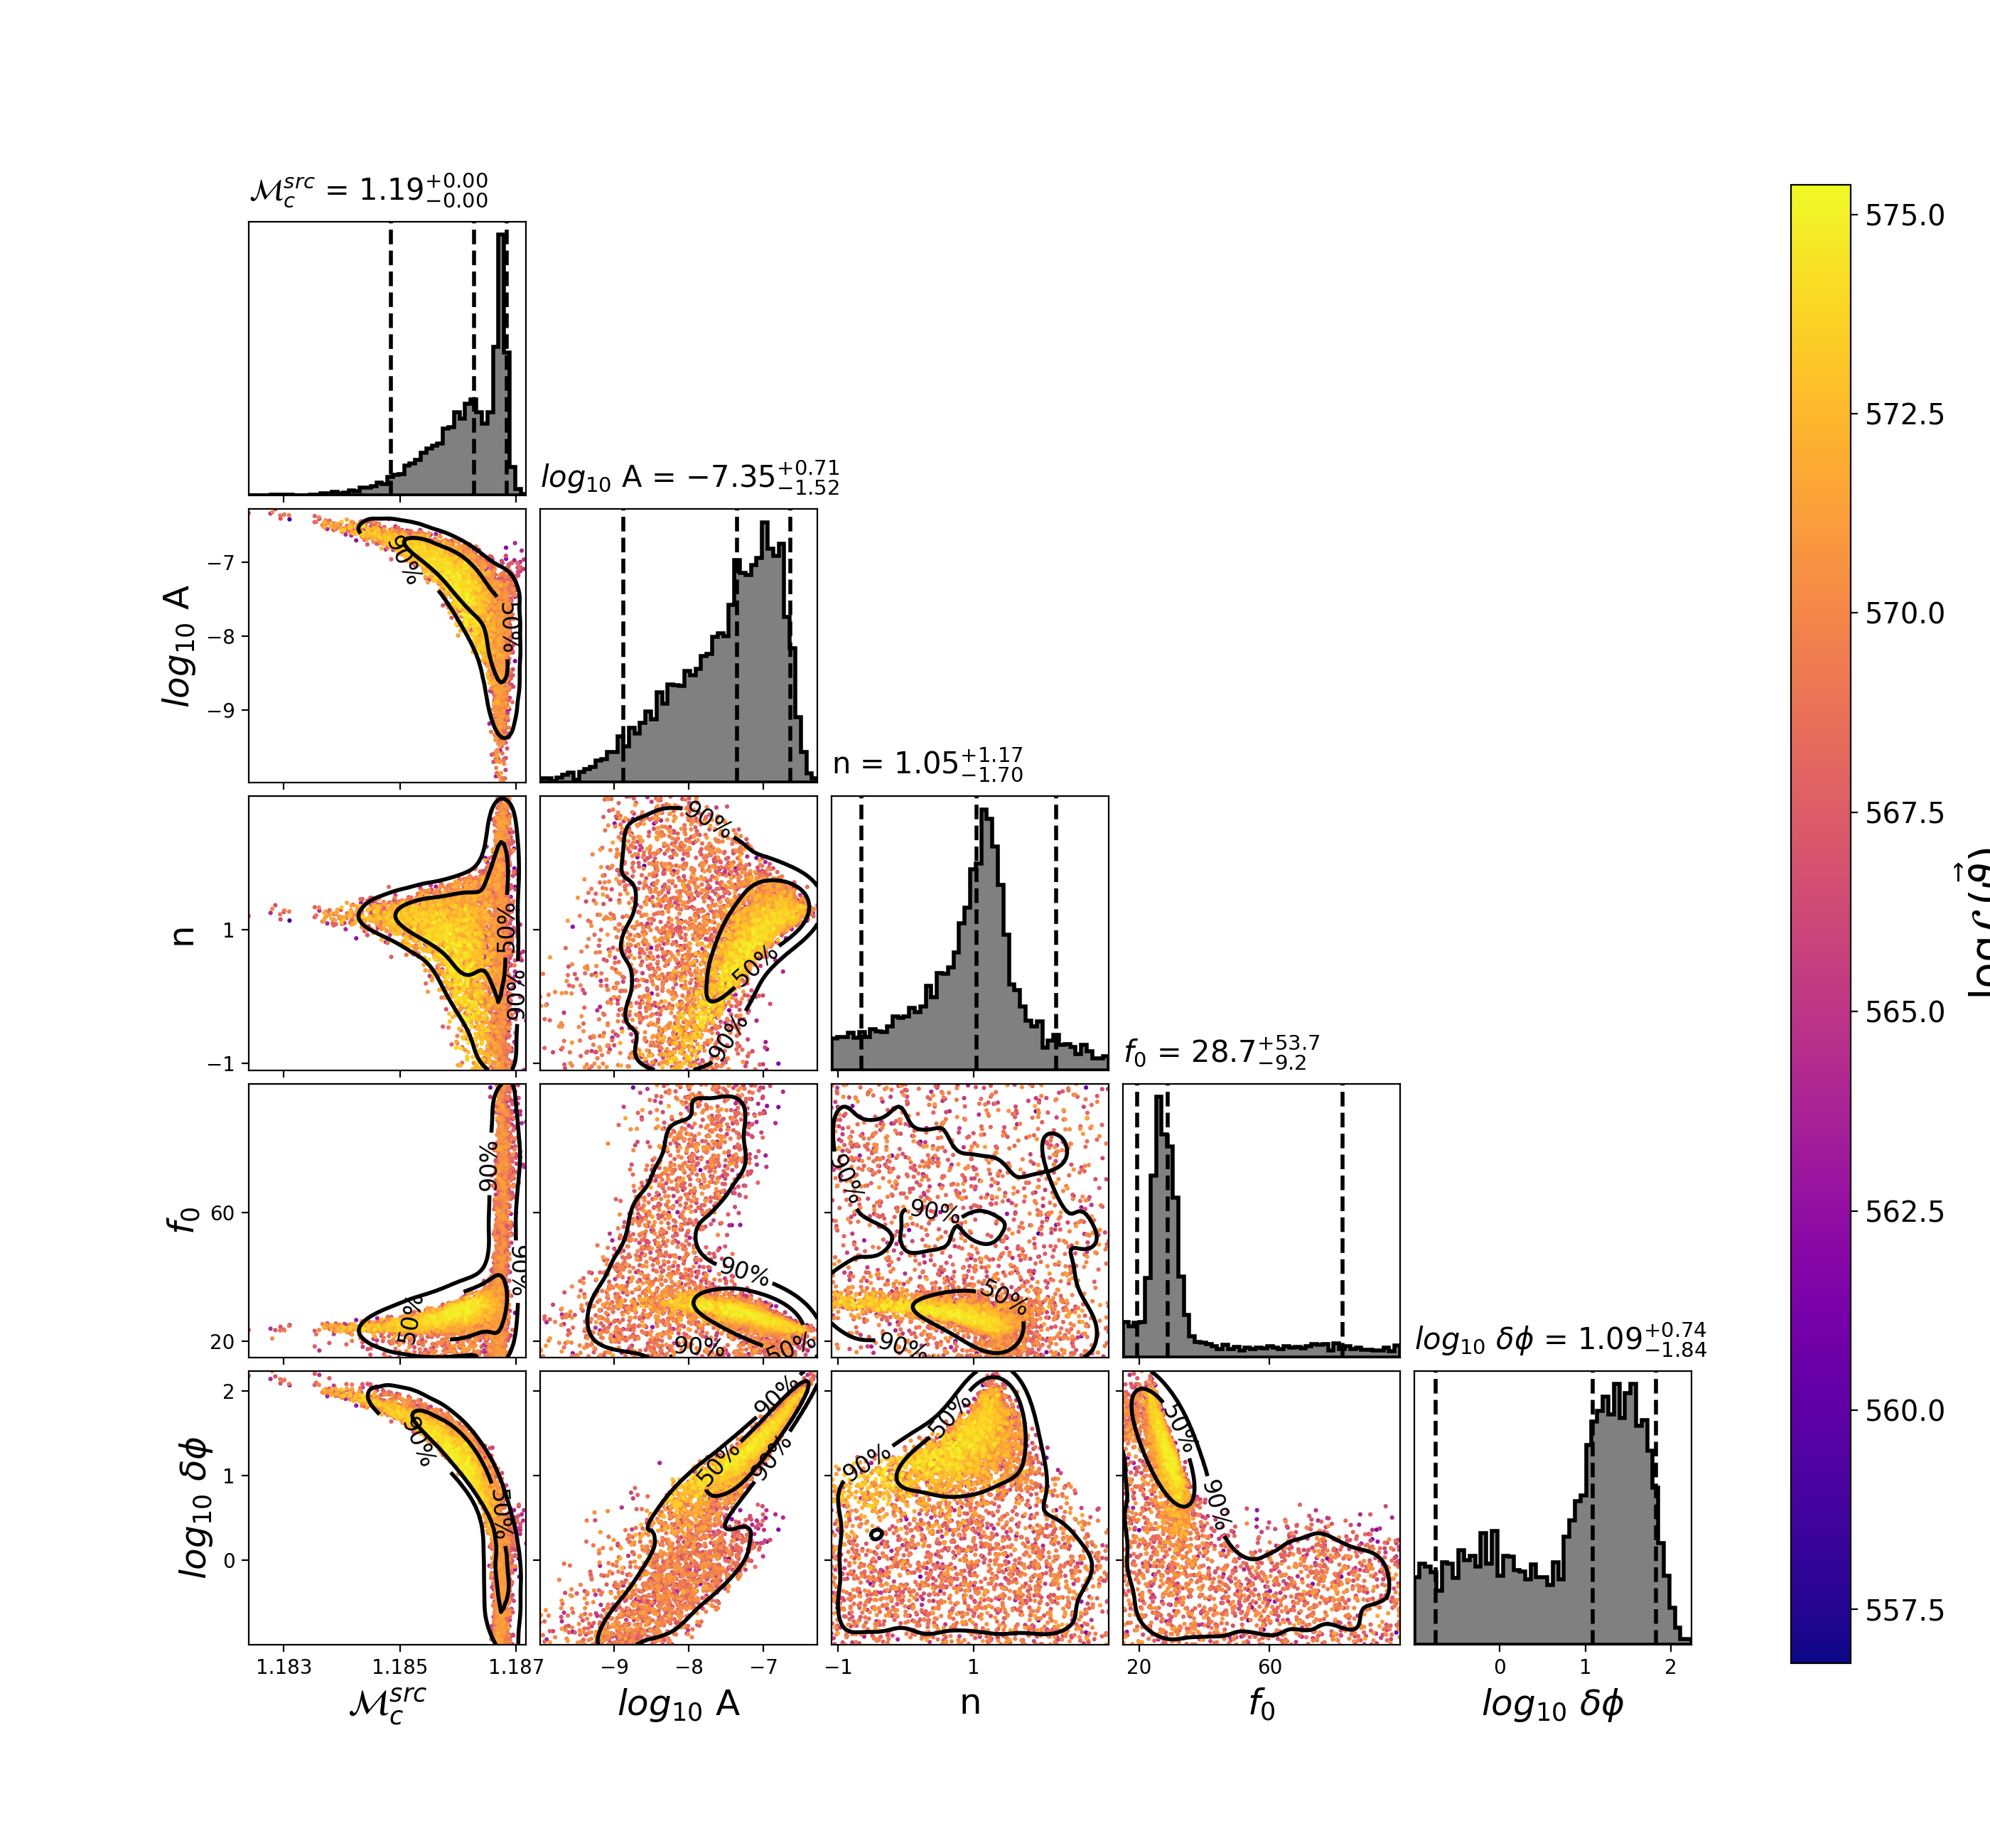

In [7]:
Image('uniform_f0_15_100_Hz_posterior.png')

### Additional data: Posterior for Gaussian Mass Distribution for $f_0$ between 15 and 800 Hz

In [8]:
!pycbc_inference_plot_posterior --plot-scatter \
--plot-contour \
--z-arg loglr \
--verbose \
--iteration -1 \
--input-file 'gaussian_large_f0_range.hdf' \
--output-file "gaussian_f0_15_800_Hz_posterior.png" \
--plot-marginal \
--parameters 'mchirp/(1+redshift(40.7)):$\mathcal{M}^{src}_{c}$' 'log10(amplitude):$log_{10}$ A' n 'f0:$f_0$' 'log10(nltides_gw_phase_diff_isco(20.0, f0, amplitude, n, mass1/(1+redshift(40.7)), mass2/(1+redshift(40.7)))):$log_{10}$ $\delta \phi$' \


2018-08-23 10:10:46,167 Loading parameters
2018-08-23 10:10:46,167 Reading input file gaussian_large_f0_range.hdf
2018-08-23 10:10:46,168 Loading samples
2018-08-23 10:10:46,187 Getting likelihood stats
2018-08-23 10:10:46,202 Plotting
/home/steven.reyes/pycbc-dev/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
2018-08-23 10:11:30,513 STREAM 'IHDR' 16 13
2018-08-23 10:11:30,514 STREAM 'sBIT' 41 4
2018-08-23 10:11:30,514 'sBIT' 41 4 (unknown)
2018-08-23 10:11:30,514 STREAM 'pHYs' 57 9
2018-08-23 10:11:30,514 STREAM 'IDAT' 78 8192
2018-08-23 10:11:31,386 Done


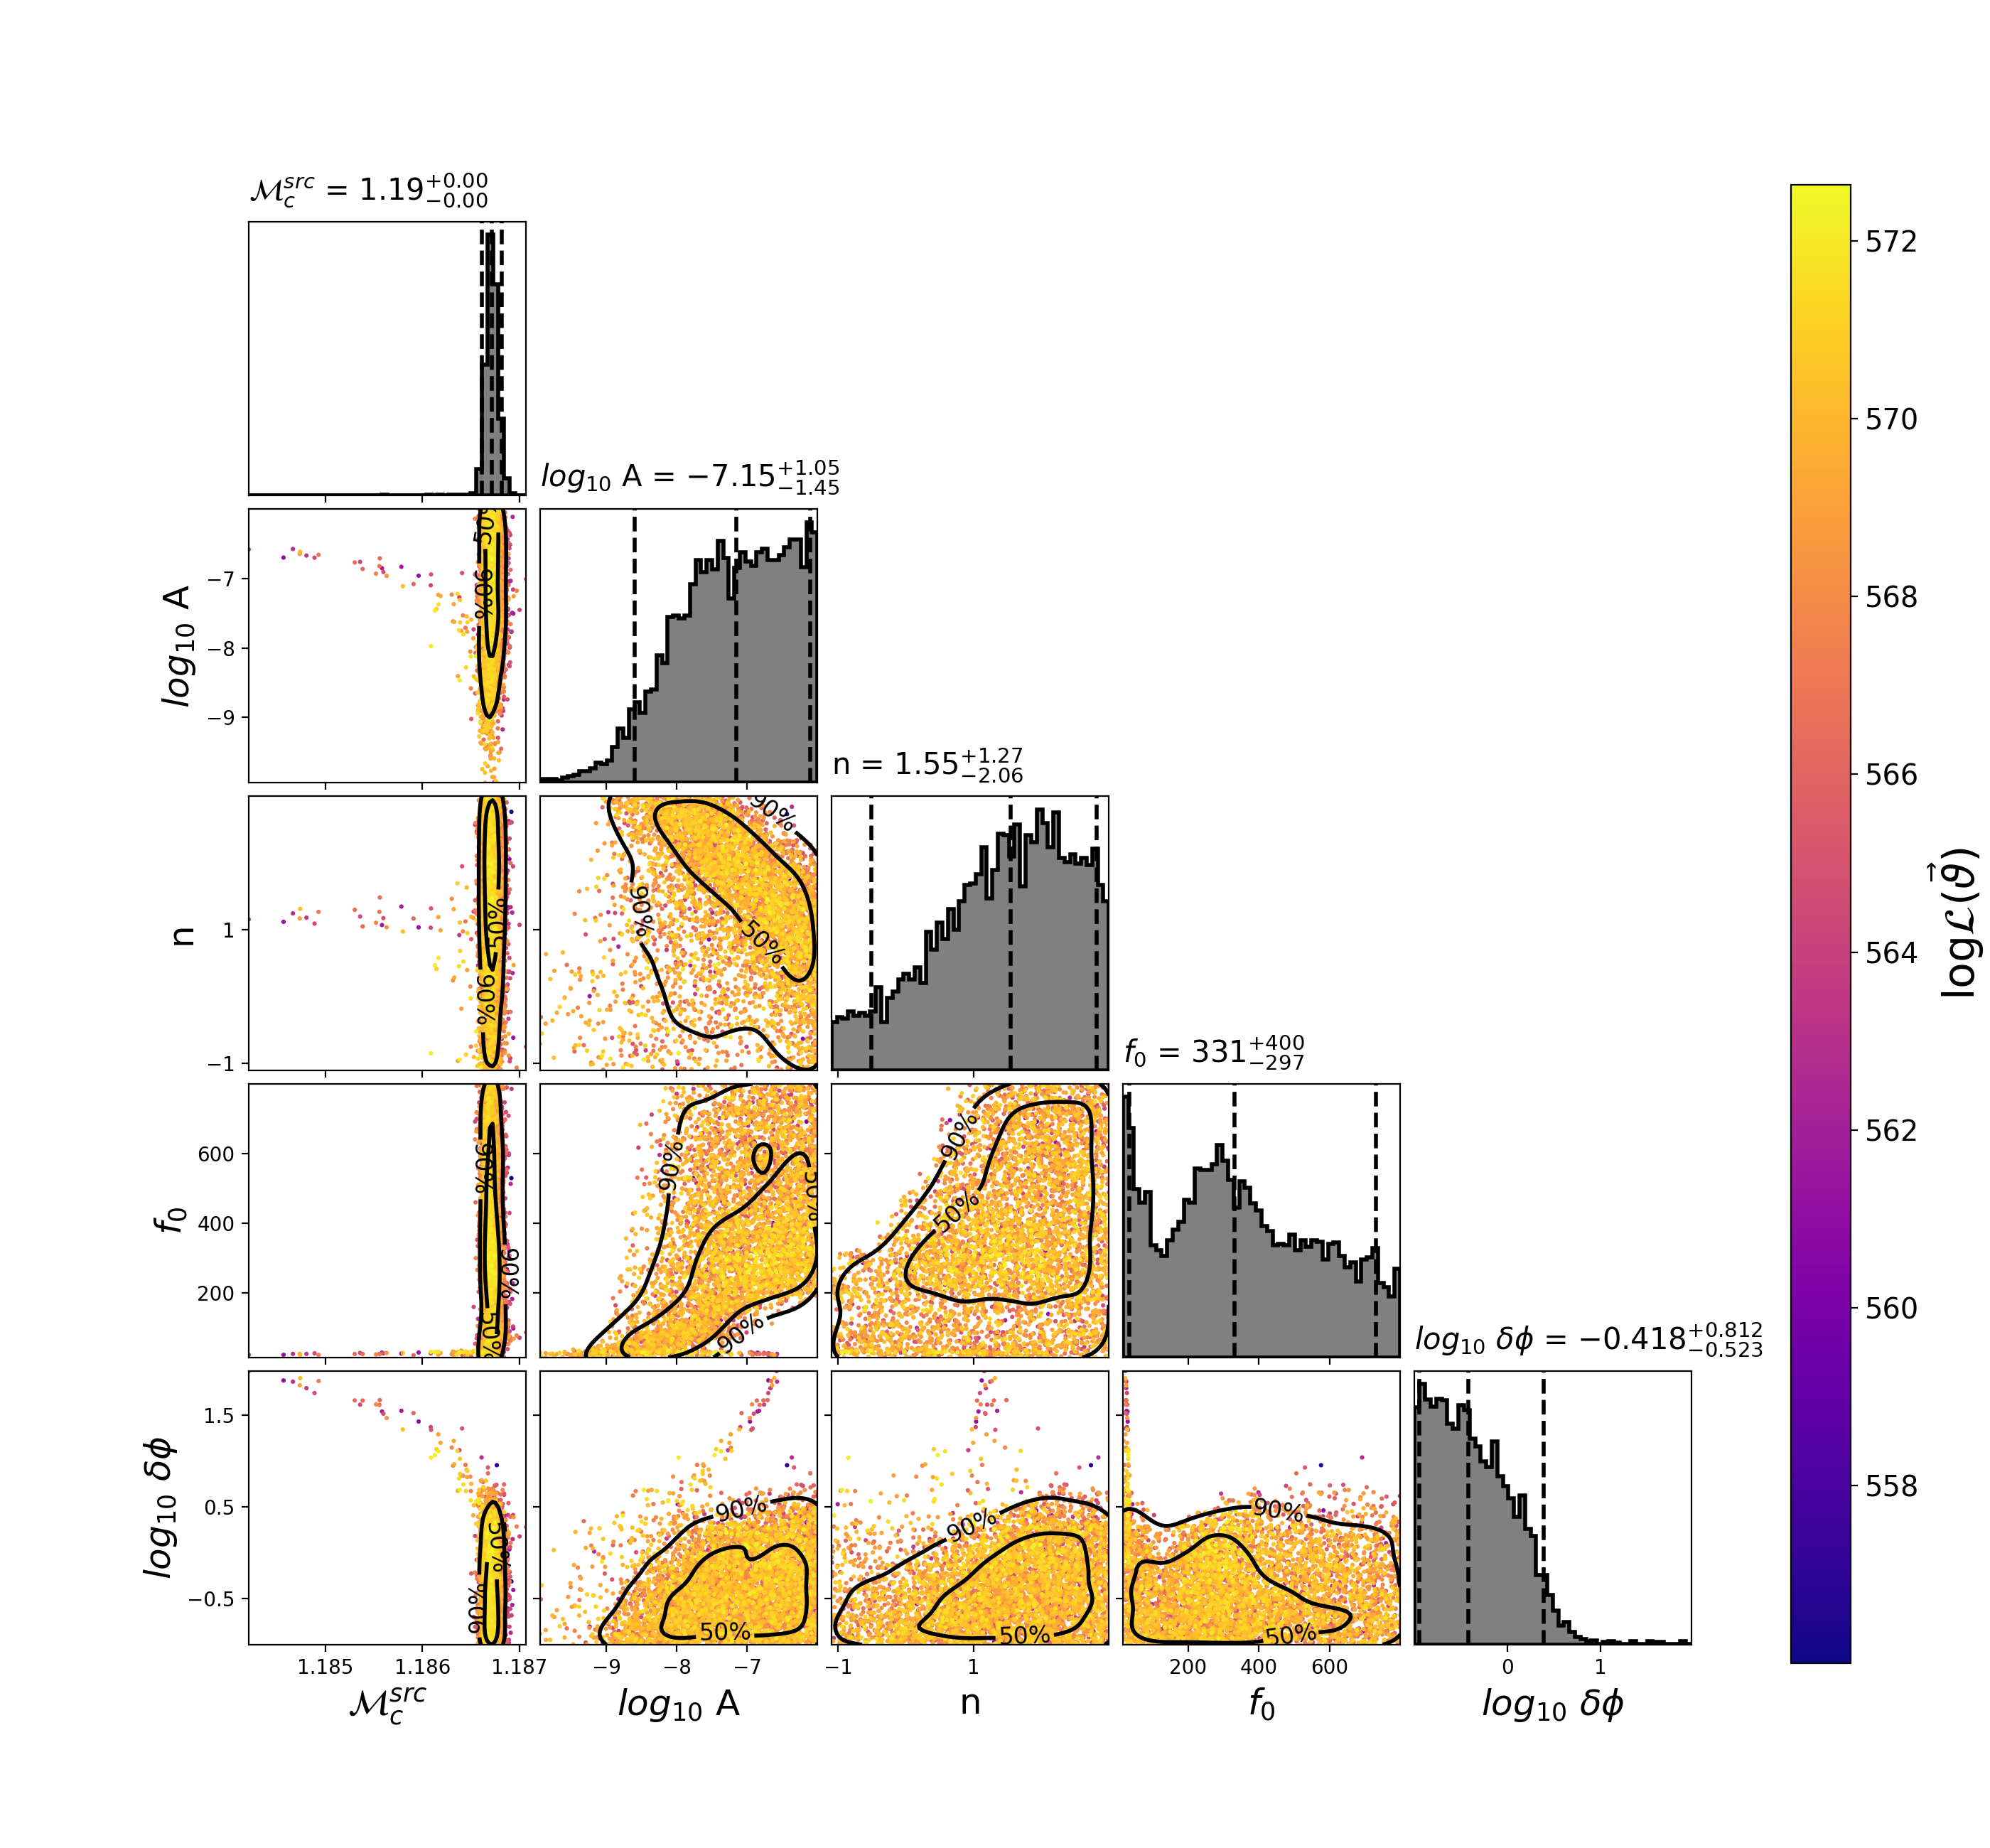

In [9]:
Image('gaussian_f0_15_800_Hz_posterior.png')

### Additional Data: Posterior for Uniform Mass Distribution for $f_0$ between 15 and 800 Hz

In [10]:
!pycbc_inference_plot_posterior --plot-scatter \
--plot-contour \
--z-arg loglr \
--verbose \
--iteration -1 \
--input-file 'uniform_large_f0_range.hdf' \
--output-file "uniform_f0_15_800_Hz_posterior.png" \
--plot-marginal \
--parameters 'mchirp/(1+redshift(40.7)):$\mathcal{M}^{src}_{c}$' 'log10(amplitude):$log_{10}$ A' n 'f0:$f_0$' 'log10(nltides_gw_phase_diff_isco(20.0, f0, amplitude, n, mass1/(1+redshift(40.7)), mass2/(1+redshift(40.7)))):$log_{10}$ $\delta \phi$' \


2018-08-23 10:11:34,313 Loading parameters
2018-08-23 10:11:34,314 Reading input file uniform_large_f0_range.hdf
2018-08-23 10:11:34,315 Loading samples
2018-08-23 10:11:34,334 Getting likelihood stats
2018-08-23 10:11:34,349 Plotting
/home/steven.reyes/pycbc-dev/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
2018-08-23 10:12:17,836 STREAM 'IHDR' 16 13
2018-08-23 10:12:17,836 STREAM 'sBIT' 41 4
2018-08-23 10:12:17,836 'sBIT' 41 4 (unknown)
2018-08-23 10:12:17,837 STREAM 'pHYs' 57 9
2018-08-23 10:12:17,837 STREAM 'IDAT' 78 8192
2018-08-23 10:12:18,714 Done


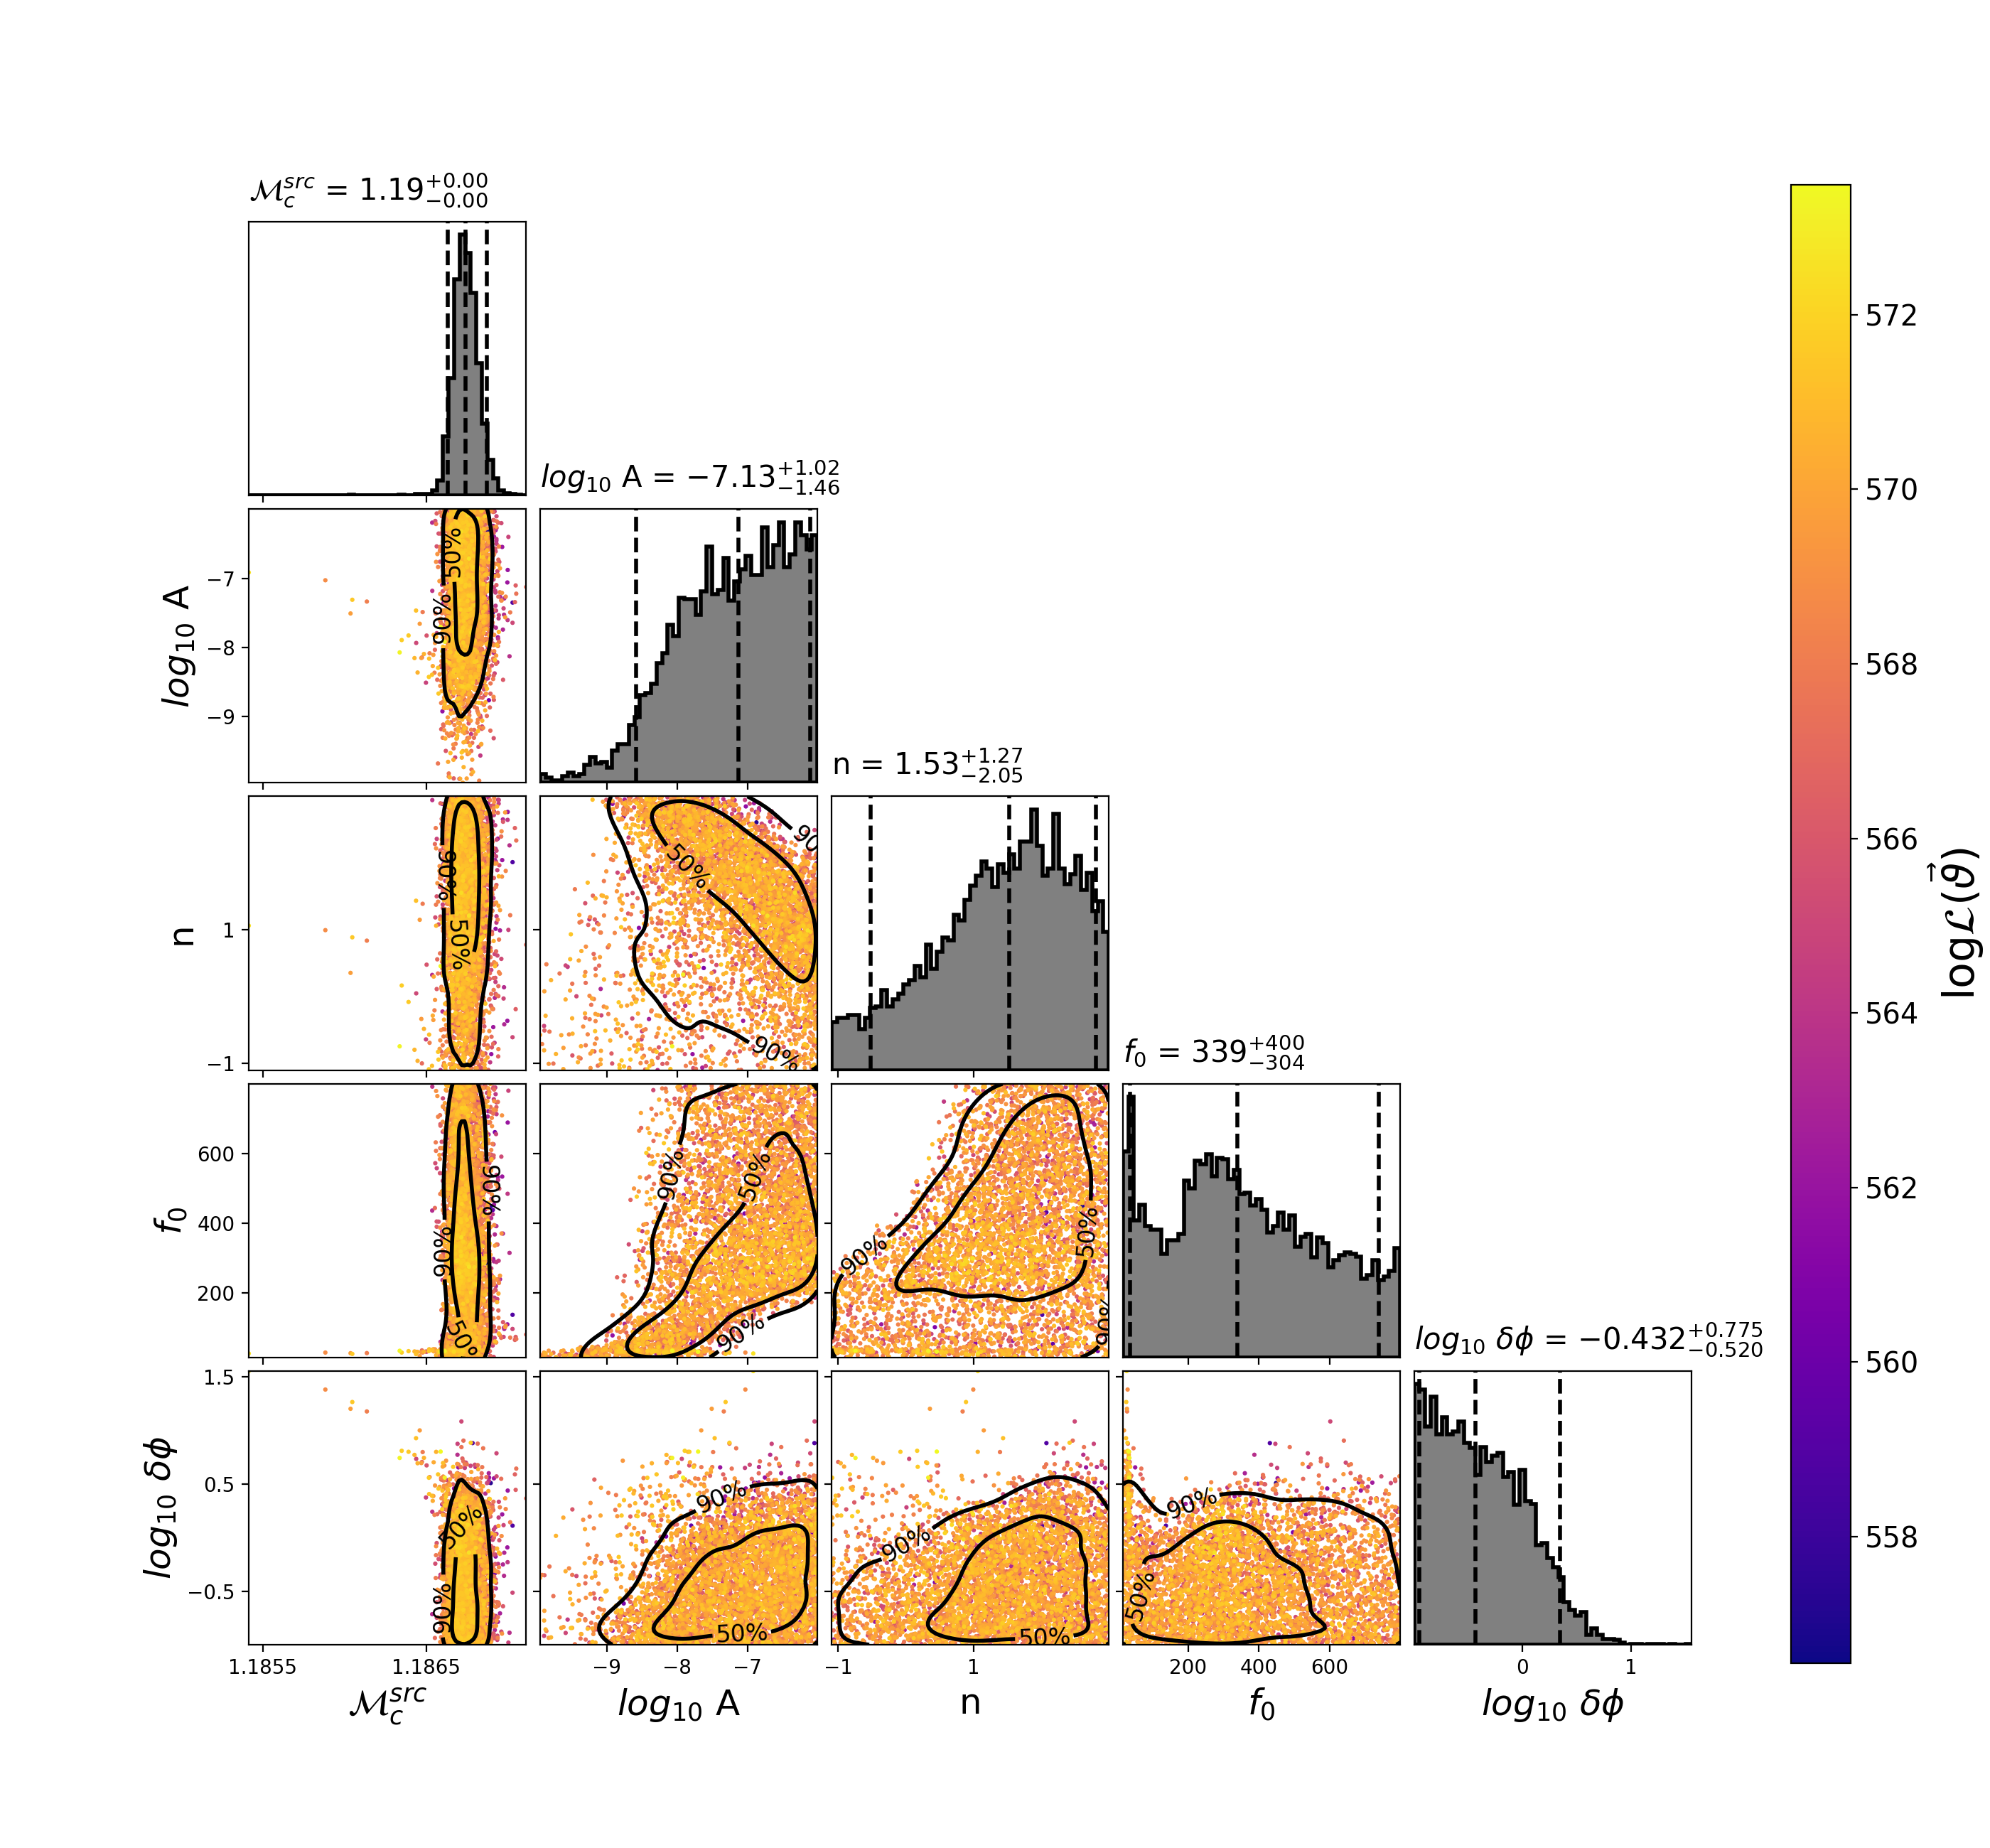

In [11]:
Image('uniform_f0_15_800_Hz_posterior.png')